In [1]:
#importing required packages

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# Data Jar

In [2]:
ground_cricket_data = {"Chirps": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
# Data Cleaning

df.head()

,Chirps,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
df.isnull().sum() # Missing Values

Chirps                0
Ground Temperature    0
dtype: int64

In [5]:
df.shape

(15, 2)

In [6]:
df.drop_duplicates() # To Delete The Duplicates

df.shape

(15, 2)

In [8]:
df.dtypes # Data In The Correct format or not

Chirps                float64
Ground Temperature    float64
dtype: object

In [9]:
df.describe() # To check The Outliers

,Chirps,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [10]:
df.Chirps.quantile(0.75)

17.15

In [11]:
# By Using The IQR Method

iqr = df.Chirps.quantile(0.75) - df.Chirps.quantile(0.25)

upper_threshold = df.Chirps.quantile(0.75) + (1.5 * iqr)

lower_threshold = df.Chirps.quantile(0.25) - (1.5 * iqr)

upper_threshold

19.699999999999996

In [12]:
lower_threshold # There is NO Outliers in The Dataset

12.9

In [ ]:
# Encoding

# There is no Categorical data so we need not to encode the Data

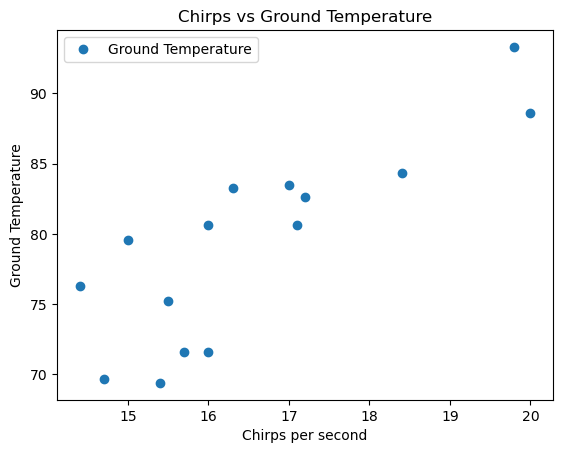

In [13]:
# EDA

df.plot(x = 'Chirps' , y = 'Ground Temperature' , style = 'o')

plt.title('Chirps vs Ground Temperature')

plt.xlabel('Chirps per second')

plt.ylabel('Ground Temperature')

plt.show()

In [14]:
# Correleation

df.corr()

,Chirps,Ground Temperature
Chirps,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [15]:
df.Chirps.values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [31]:
# Splitting The Data

X = df.loc[:, ['Chirps']].values # select all rows and select all columns except the last column as my feature

y = df.loc[:, 'Ground Temperature'].values # target as arrays

from sklearn.model_selection import train_test_split #import the required function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
y_test

array([71.6, 84.3, 93.3, 69.4, 88.6])

In [28]:
X_test

array([[15.7],
       [18.4],
       [19.8],
       [15.4],
       [20. ]])

In [21]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [ ]:
# Scaling The Data

In [32]:
from sklearn.preprocessing import StandardScaler # importing the required function

scaler = StandardScaler() #initialis

scaler.fit(X_train) # find the values of mu and sigma

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [30]:
X_test_scaled

array([[-0.22966561],
       [ 2.58895784],
       [ 4.0504663 ],
       [-0.542846  ],
       [ 4.25925322]])

In [ ]:
# Task Jar

# Supervised Learning

    # Linear Regression (Y = m * x + c)

In [ ]:
# Model Jar

# Modeling The Data

from sklearn.linear_model import LinearRegression # importing all required function

regressor = LinearRegression() # Ground Temperature = m * Chirps + c

In [33]:
# Learning Jar

regressor.fit(X_train , y_train)# Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [34]:
regressor.intercept_

34.991746094522426

In [36]:
regressor.coef_

array([2.70199723])

In [38]:
regressor.predict([[20]])

array([89.03169073])

In [39]:
y_pred = regressor.predict(X_test)

y_pred

array([74.7111054 , 78.2237018 , 88.49129128, 76.87270318, 78.2237018 ])

In [40]:
Dataset = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})

Dataset

,Actual,Predicted
0,69.7,74.711105
1,80.6,78.223702
2,93.3,88.491291
3,75.2,76.872703
4,71.6,78.223702


In [41]:
regressor.predict([[18]])

array([83.62769626])

In [ ]:
# Evaluation Jar

In [43]:
# Metrics

from sklearn import metrics # metrics will contain all the evaluation metrics

Df = pd.DataFrame([{'R2_Score' : metrics.r2_score(y_test,y_pred)}])

Df

,R2_Score
0,0.719524


In [44]:
# Another Way To Find R2 Score

regressor.score(X_test,y_test)

0.7195236606130346